In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import os
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker


# Along-coast connectivity

Goals are to find overall typical and possible likelihood of drifters moving between along the coast and particularly between the bays. First necessary calculations:

1. Find when drifters enter and exit each coastal box. This is calculated in `shelf_transport/find_coastal_path_connectivity.py`, run on hafen, and gives files of the type `shelf_transport/calcs/alongcoastconn/2004-01-01.npz`. More details are given in a notebook called [Coastal connectivity calculations](Coastal%20connectivity%20calculations.ipynb)
1. The connectivity along the coast itself, in time increments, is set up by summing the files from the previous step; this is done in `shelf_transport/make_conn_plots.run_in_time()` and makes files of the type `calcs/alongcoastconn/conn_in_time/2004-01-01T00.npz`.

In [ ]:
# Step 1: do this on hafen, and it takes about an hour per file, so I subdivided by hand. Here I show it overall.
os.chdir('..')
run find_coastal_path_connectivity

In [ ]:
# Step 2: do this on hafen also, and takes a bit of time overall.
import make_conn_plots
make_conn_plots.run_in_time()

In [ ]:
# Step 3: aggregate into months
make_conn_plots.run()

# Overall view of connectivity: matrices

Using the previously-calculated files, I make plots of the overall along-coast connectivity in the form of connectivity matrices by month.


In [9]:
os.chdir('shelf_transport')

<IPython.core.display.Javascript object>


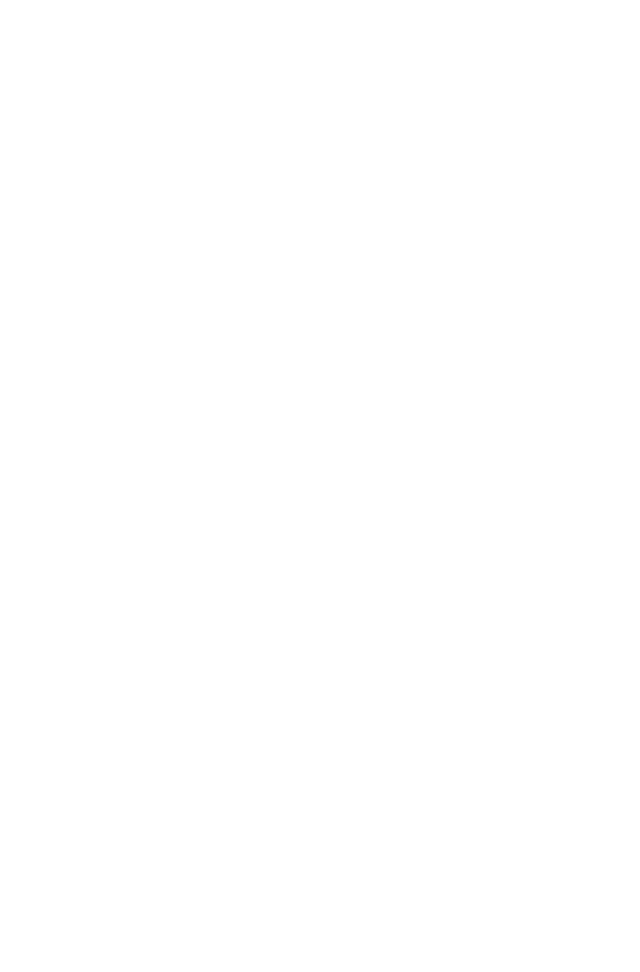

<IPython.core.display.Javascript object>


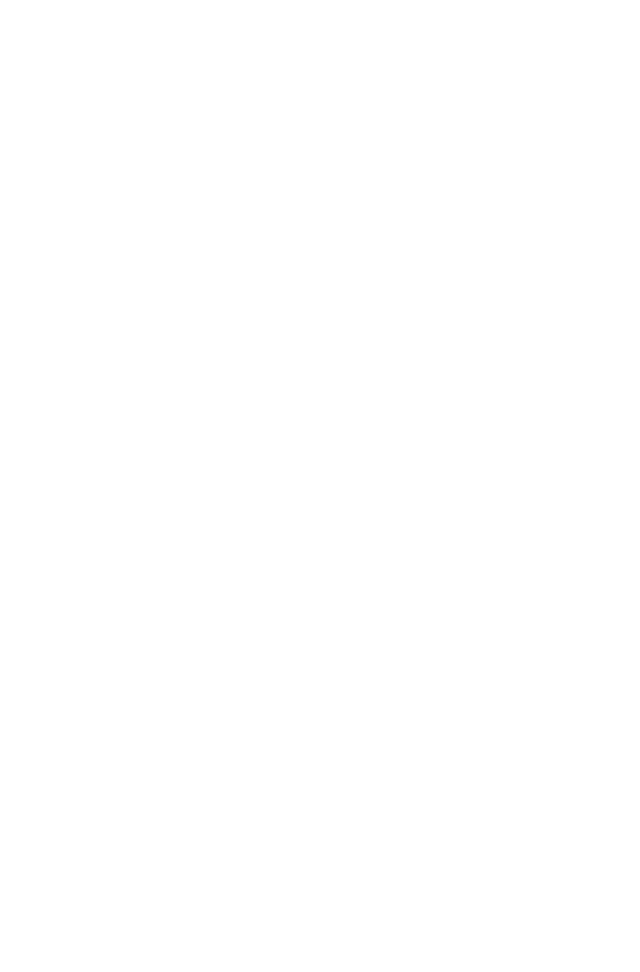

In [10]:
# os.chdir('..')
import make_conn_plots
# os.chdir('notebooks')
# make plot
make_conn_plots.plot_monthly()

# Bay-oriented view in time

Next I narrow the view to 7 bays only, in order to examine more detail in time and variation across years, and with a clearer value of the values at a smaller number of points in space.

The boxes used for counting as drifters moving between being "near" bay entrances are shown here. They are made from shelf_transport/make_conn_plots.py (plot_domain).

Number states approximately central along-coast distance and what is shown in along-coast connectivity matrix

![bays1](images/bays1.png)
![bays2](images/bays2.png)

Individual bay images are in the note.

From Evernote note ["Bay connectivity box ranges maps"](https://www.evernote.com/shard/s367/nl/2147483647/94f7fa25-2363-4e9d-a6cc-61216c8c7e23/)

In [ ]:
make_conn_plots.calc_bayconn()

In [ ]:
# then make plots
make_conn_plots.plot_bayconn()

# What causes the transport seen?

Run statistics on a bunch of this stuff together to pull out important relationships.

* in time or space?


# Can simplified physical models explain this behavior?

Our hypothesis is that the drifters are being moved along the coast primarily by wind-driven flow relative to the coastline geometry, possibly modified by the river plume (probably through stratification). We can compare the behavior seen in reality with a simple theoretical model. Wind is imposed at the ocean surface in some direction, leading to coastal setup with associated geostrophic flow and Ekman drift at the surface. We have two cases:

1. Well-mixed water column
1. Two-layer conditions

Here is the experiment. Impose wind over 2-10 days (weatherband time scale), steady, at angles rotating around the compass in 15 degree increments. Should be able to do this analytically. Calculate the resultant velocities and therefore distance traveled along-coast (ignoring off-shore transport) for the scenarios for a straight coastline.

Write out equations for u, v from Gill pg. 320, follow argument to separate into velocity due to pressure and due to Ekman. Then deal with separately:
* Pressure: follow Csanady for coastal jet. Start with barotropic and then use 2 layer if needed.
* Ekman: use Vallis solution for surface and for geostrophic velocity fill in pressure along-coast velocity 

* Use along-coast velocity only to start. Probably only certain cases will be relevant anyway.
* Do care about cross-shore distance for along-coast current
* Assumes Ekman is steady

In [93]:
f

7.2920999999999988e-05

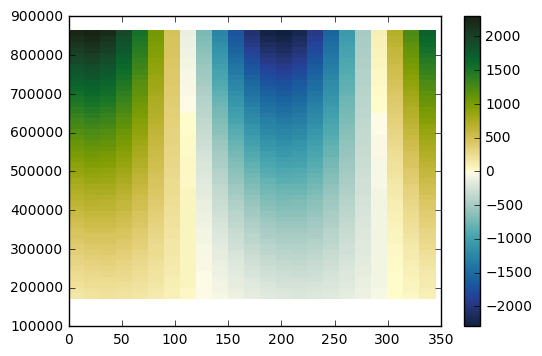

In [91]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cmocean.cm as cmo

# constants
rho0 = 1025  # background density, kg/m^3
H = 10  # Depth, m
g = 9.81  # gravitational constant, m/s^2
f = 2*7.2921e-5*np.sin(30*np.pi/180)  # Coriolis parameter, for 30 degrees North
R = np.sqrt(g*H)/f  # Deformation radius, m
AKv = 5e-5  # vertical viscosity coefficient, m^2/s; from some quick TXLA averages
D = np.sqrt(2*AKv/f)  # Ekman depth

# parameters
theta = np.arange(0, 360, 15)*np.pi/180  # angles, radians
T = np.linspace(2, 10)*86400  # 2-10 days in seconds
Theta, TT = np.meshgrid(theta, T)  # varying parameters in 2d

# Changing wind stress amplitude and y position
W = 0.05  # also do up to W = 0.4  # N/m^2
y = 0  # np.linspace(0,R)
# # let land vary angle
# phi = 30*np.pi/180
# Theta -= phi

# do calculation
x = (W*TT/rho0)*(np.cos(Theta)/(2*H) * TT * np.exp(-y/R) + 1/(f*D) * (np.cos(Theta) + np.sin(Theta)))

xp = (W*TT/rho0)*(np.cos(Theta)/(2*H) * TT * np.exp(-y/R))
xe = (W*TT/rho0)*(1/(f*D) * (np.cos(Theta) + np.sin(Theta)))

plt.pcolormesh(Theta*180/np.pi, TT, x/1e3, cmap=cmo.delta); plt.colorbar()

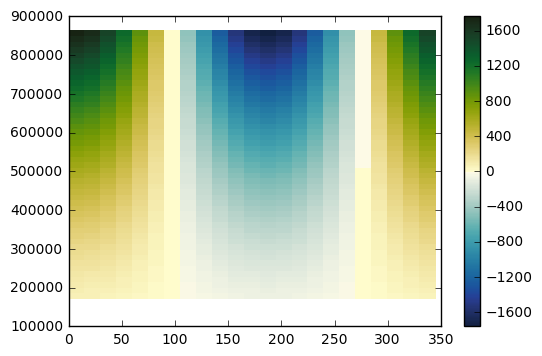

In [90]:
plt.pcolormesh(Theta*180/np.pi, TT, xp/1e3, cmap=cmo.delta); plt.colorbar()

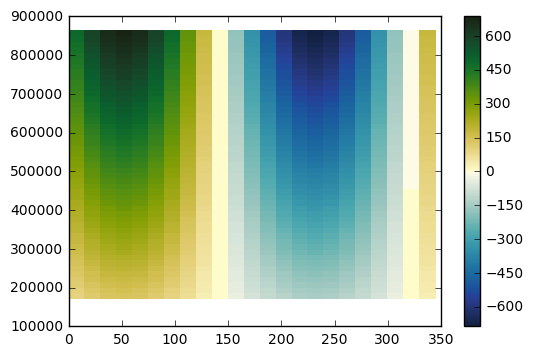

In [89]:
plt.pcolormesh(Theta*180/np.pi, TT, xe/1e3, cmap=cmo.delta); plt.colorbar()

In [85]:
(np.cos(Theta) + np.sin(Theta))

array([[  1.00000000e+00,   1.22474487e+00,   1.36602540e+00, ...,
         -2.22044605e-16,   3.66025404e-01,   7.07106781e-01],
       [  1.00000000e+00,   1.22474487e+00,   1.36602540e+00, ...,
         -2.22044605e-16,   3.66025404e-01,   7.07106781e-01],
       [  1.00000000e+00,   1.22474487e+00,   1.36602540e+00, ...,
         -2.22044605e-16,   3.66025404e-01,   7.07106781e-01],
       ..., 
       [  1.00000000e+00,   1.22474487e+00,   1.36602540e+00, ...,
         -2.22044605e-16,   3.66025404e-01,   7.07106781e-01],
       [  1.00000000e+00,   1.22474487e+00,   1.36602540e+00, ...,
         -2.22044605e-16,   3.66025404e-01,   7.07106781e-01],
       [  1.00000000e+00,   1.22474487e+00,   1.36602540e+00, ...,
         -2.22044605e-16,   3.66025404e-01,   7.07106781e-01]])

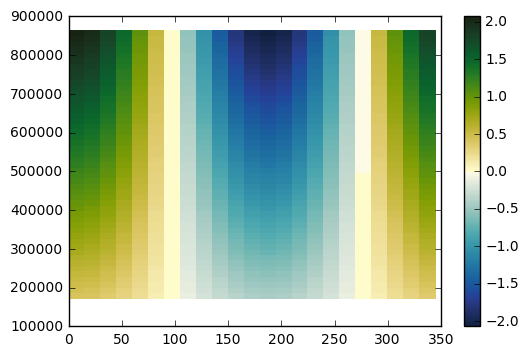

In [86]:
# look at just velocities for sanity check
up = (W/rho0)*(np.cos(Theta)/(2*H) * TT * np.exp(-y/R))
ue = (W/rho0)*(1/(f*D) * (np.cos(Theta) + np.sin(Theta)))

plt.pcolormesh(Theta*180/np.pi, TT, up, cmap=cmo.delta); plt.colorbar()

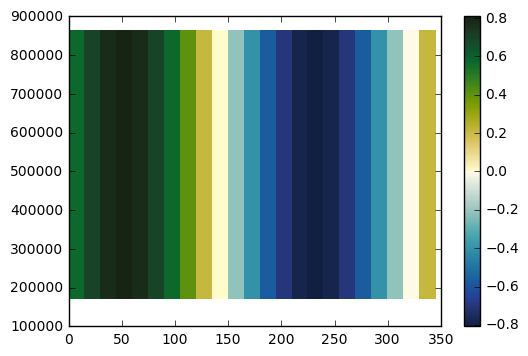

In [87]:
plt.pcolormesh(Theta*180/np.pi, TT, ue, cmap=cmo.delta); plt.colorbar()

In [45]:
# calculate x in segments along an analytic section of coast approximating the bend in TX

# make a giant circle. Arc length between two ends is 245 km
arc = 245  # arc length, distance between two locations, km
C = 70*np.pi/180  # central angle
r = arc/C  # circle radius
h, k = 340000, 490000

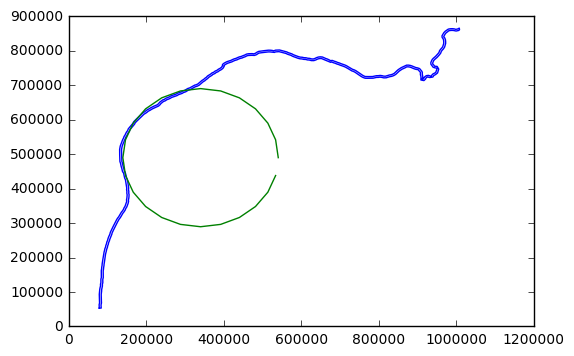

In [46]:
d = np.load('../calcs/coastpaths.npz')
op = d['outerpathxy'].item()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(op.vertices[:,0], op.vertices[:,1])

ax.plot(r*1000*np.cos(theta) + h, r*1000*np.sin(theta) + k)

In [66]:
# find the analytic change in relative wind impact for a 245km arc length section of a circle with radius 200km
# need to add up over delta x's to get the distance

phis = np.linspace(0,70, 40)
xland = np.zeros(x.shape)
for phi in phis:
    ThetaPhi = Theta - phi  # Phi is changing to represent land, for 70 degrees of a circle
    # Add on each piece along the coast
    xland += W*TT*(np.cos(ThetaPhi)/(2*rho0*H) * TT * np.exp(-y/R) + 1/(f*D) * (np.cos(ThetaPhi) + np.sin(ThetaPhi)))


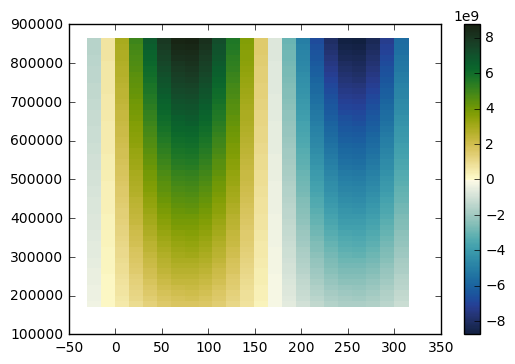

In [67]:
plt.pcolormesh(Theta*180/np.pi, TT, xland, cmap=cmo.delta); plt.colorbar()

In [59]:
np.exp(-100000/R)

0.47891229370104837

Calculate typical depth and vertical salinity structure in along-coast boxes

In [83]:
# save grid nodes that are within each coast box
import netCDF4 as netCDF
m = 
d = np.load('../calcs/coastpaths.npz')
paths = d['paths']
nodes = []
for path in paths:
    path.contains_points
    nodes.extend(path.vertices[:2,:] for path in paths[:50])
# plt.plot(pts[:,0], pts[:,1])
# x = []; y = []
# for path in paths:
#     x.append(path)

In [90]:
d = np.load('../calcs/coastpaths.npz')
d.keys()

['paths', 'pathsxy', 'pathsg', 'outerpathxy', 'outerpathg']

In [ ]:
# Eventually do with actual grid

# What fields are experienced by drifters?

Calculate temperature and salinity fields experienced by drifters at different locations along the coast at different times.